In [3]:
!apt-get install wget

# Getting the sacrifice sound file
!wget https://cdn.freesound.org/previews/567/567852_12708796-lq.mp3

# Getting the drums' sound file
!wget https://cdn.freesound.org/previews/565/565186_12708796-lq.mp3

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [18]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import scipy

# features https://librosa.org/doc/main/feature.html
# https://www.kaggle.com/code/ashishpatel26/feature-extraction-from-audio
# https://maelfabien.github.io/machinelearning/Speech9/#
# https://winntbg.bg.agh.edu.pl/skrypty4/0599/podstawy_uczenia.pdf

In [6]:
# load the audio signal and its sample rate
sac_file = 'test.mp3'
sacrifice_signal, sample_rate = librosa.load(sac_file)

In [7]:
sample_rate

22050

In [8]:
sacrifice_signal

array([3.7076039e-05, 4.1981930e-05, 1.8823594e-05, ..., 6.2709609e-05,
       6.0008086e-05, 4.1797164e-05], shape=(1296320,), dtype=float32)

In [9]:
sacrifice_signal.shape

(1296320,)

In [10]:
display(Audio(sac_file, autoplay=True))

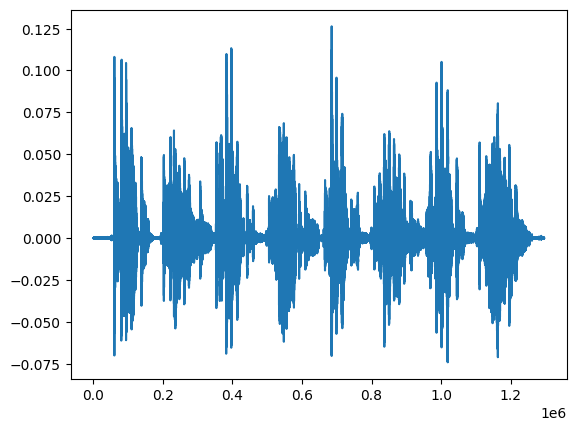

In [11]:
plt.plot(sacrifice_signal)

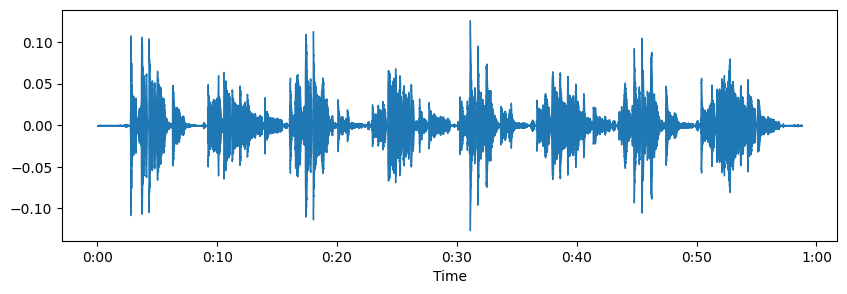

In [12]:
plt.figure(figsize=(10, 3))
librosa.display.waveshow(sacrifice_signal, sr=sample_rate)
plt.show()

C:\Users\julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\julia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


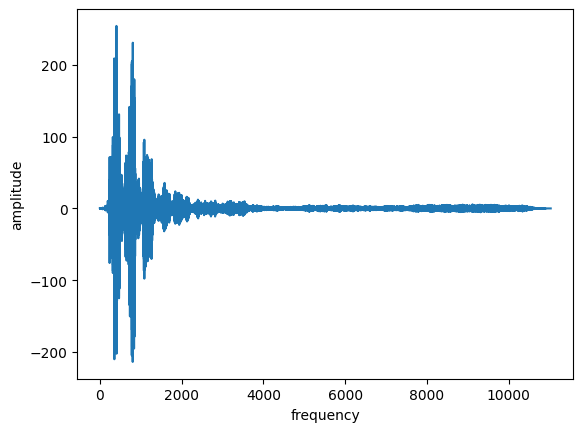

In [13]:
fourier = np.fft.fft(sacrifice_signal)
w = np.linspace(0, sample_rate, len(fourier))

# First half is the real component, second half is imaginary
fourier_to_plot = fourier[0:len(fourier)//2]
w = w[0:len(fourier)//2]

plt.figure(1)

plt.plot(w, fourier_to_plot)
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.show()

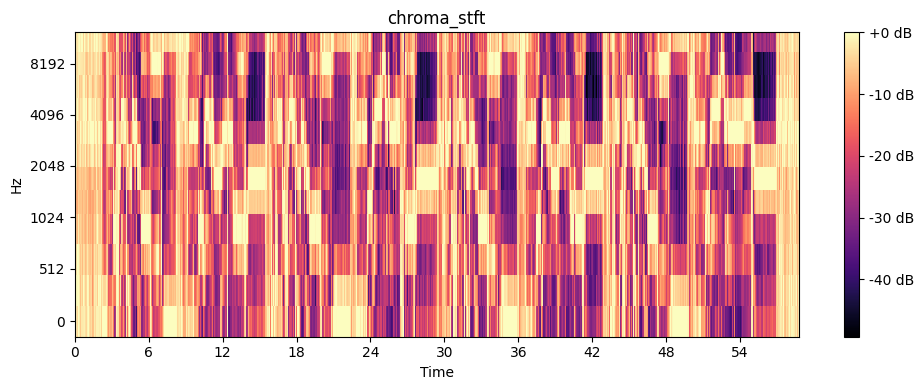

In [14]:
# Compute the mel-spectrogram
mel_spectrogram = librosa.feature.chroma_stft(y=sacrifice_signal, sr=sample_rate)

# Plot the mel-spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), sr=sample_rate, hop_length=512, y_axis="mel", x_axis="time")
plt.colorbar(format="%+2.0f dB")
plt.title("chroma_stft")
plt.tight_layout()
plt.show()

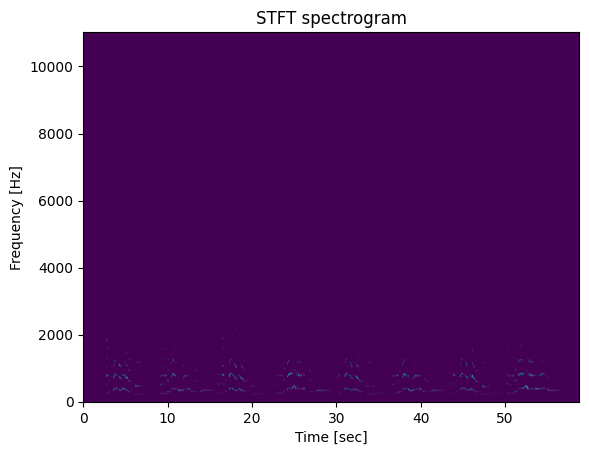

In [15]:
from scipy import signal
f, t, Zxx = signal.stft(sacrifice_signal, sample_rate, nperseg=1000)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, shading='gouraud')
plt.title('STFT spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

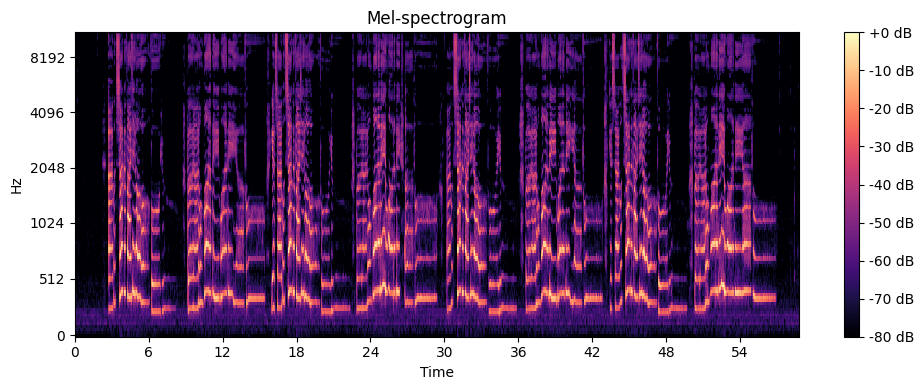

In [16]:
# Compute the mel-spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=sacrifice_signal, sr=sample_rate)

# Plot the mel-spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), sr=sample_rate, hop_length=512, y_axis="mel", x_axis="time")
plt.colorbar(format="%+2.0f dB")
plt.title("Mel-spectrogram")
plt.tight_layout()
plt.show()

In [19]:
# Calculate various statistical features
features = {
    'mean': np.mean(sacrifice_signal),
    'median': np.median(sacrifice_signal),
    'std_dev': np.std(sacrifice_signal),
    'min': np.min(sacrifice_signal),
    'max': np.max(sacrifice_signal),
    'skewness': scipy.stats.skew(sacrifice_signal),
    'kurtosis': scipy.stats.kurtosis(sacrifice_signal),
    'rms': np.sqrt(np.mean(sacrifice_signal**2)),
    'peak_to_peak': np.ptp(sacrifice_signal),
    'iqr': scipy.stats.iqr(sacrifice_signal)
}

for feature, value in features.items():
    print(f"{feature}: {value}")

mean: 1.9157832298333233e-07
median: -1.7669615772319958e-05
std_dev: 0.011675369925796986
min: -0.07415010035037994
max: 0.12634897232055664
skewness: 0.6441895961761475
kurtosis: 6.862979888916016
rms: 0.01167537085711956
peak_to_peak: 0.20049907267093658
iqr: 0.005438257358036935
